In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#loading the dataset into dataframe
car = pd.read_csv('/content/car_age_price.csv')
car.head(20)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [149]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [150]:
car['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [151]:
corr=car.corr(method='pearson')
corr

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<Axes: >

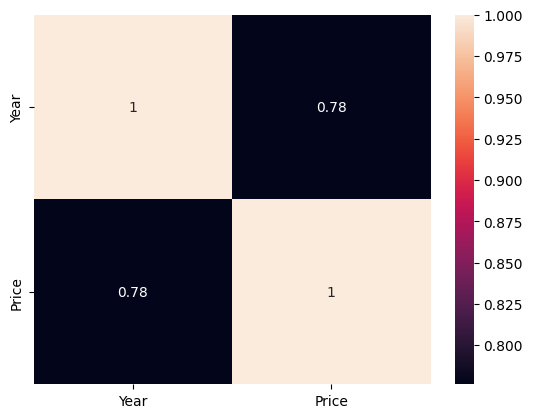

In [152]:
sns.heatmap(corr,annot=True)

In [153]:
#Year and Price are positively correlated

<Axes: xlabel='Price', ylabel='Year'>

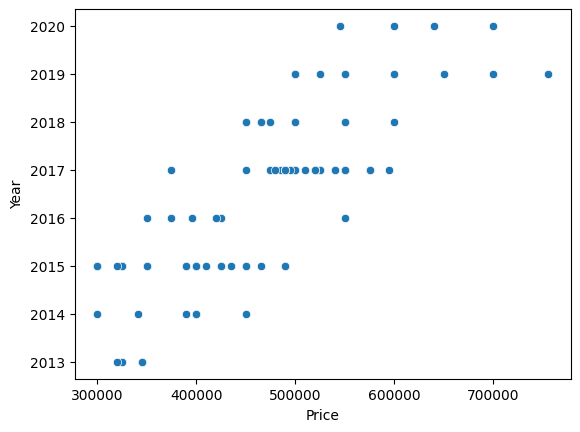

In [154]:
sns.scatterplot(x='Price',y='Year',data=car)

In [155]:
#spliting target variable as Price(y) and other feaures(X)
y=car['Price']
X=car.drop(['Price'],axis=1)

In [156]:
X.shape

(112, 1)

In [157]:
y.shape

(112,)

In [158]:
#Reshapping y
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(112, 1)

In [159]:

#Scaling of data
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [160]:
#split the data to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


# Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression
ln_model=LinearRegression()
ln_model.fit(X_train,y_train)
y_predictions=ln_model.predict(X_test)


In [ ]:
#Prediction of car price in 2022 model secondhand i10 using Linear Regression

In [162]:
data=pd.DataFrame({'Year':[2022]})
data_scaled = scaler_X.transform(data)
predicted_price_scaled = ln_model.predict(data_scaled)


In [173]:
predicted_price = scaler_y.inverse_transform(predicted_price_scaled)
print(' Predicted price of a 2022 model second-hand grand i10 is',predicted_price[0])

 Predicted price of a 2022 model second-hand grand i10 is [743601.61594505]


Text(0.5, 1.0, 'Actual vs Predicted Prices (Lnear Regression)')

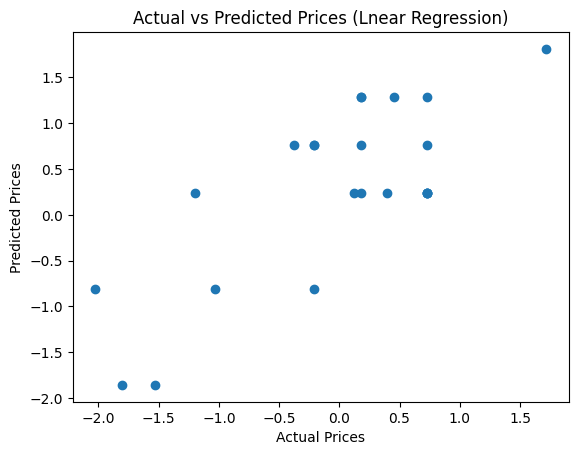

In [164]:
#scatter plot showing actual price vs predicted price for Linear Regression
plt.scatter(y_test,y_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Lnear Regression)')

In [165]:
#Evaluation metrices for Linear Regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean squared error is",mean_squared_error(y_predictions,y_test))
print("Mean absolute error is",mean_absolute_error(y_predictions,y_test))
print("R2 score is",r2_score(y_predictions,y_test))

Mean squared error is 0.52470677333406
Mean absolute error is 0.5895295935049284
R2 score is 0.4052626156691991


**Lasso** **Regression**

In [166]:
from sklearn.linear_model import Lasso

In [167]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_y_predictions=lasso_model.predict(X_test)

In [ ]:
#Prediction of car price in 2022 model secondhand i10 using Lasso Regression

In [174]:
data=pd.DataFrame({'Year':[2022]})
data_scaled = scaler_X.transform(data)

lasso_predicted_price_scaled = lasso_model.predict(data_scaled)
lasso_predicted_price_scaled_2d = lasso_predicted_price_scaled.reshape(-1, 1)


In [175]:
lasso_predicted_price = scaler_y.inverse_transform(lasso_predicted_price_scaled_2d)

print(' Predicted price of a 2022 model second-hand grand i10 using Lasso is',lasso_predicted_price[0])

 Predicted price of a 2022 model second-hand grand i10 using Lasso is [484696.59550562]


Text(0.5, 1.0, 'Actual vs Predicted Prices (Lasso Regression)')

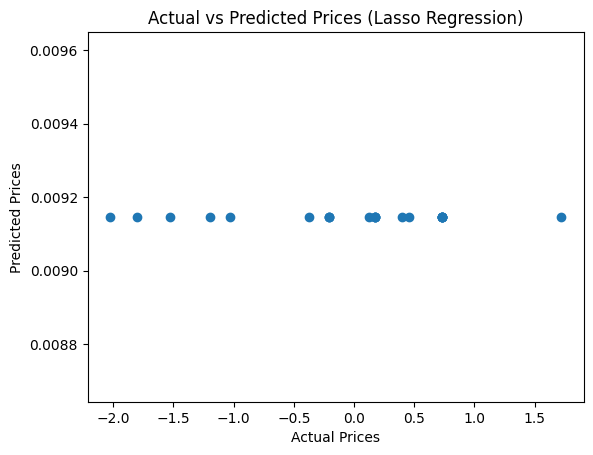

In [170]:
#scatter plot showing actual price vs predicted price for Lasso Regression
plt.scatter(y_test,lasso_y_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Lasso Regression)')

In [171]:
#Prediction of car price in 2022 model secondhand i10 using Lasso Regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean squared error is",mean_squared_error(lasso_y_predictions,y_test))
print("Mean absolute error is",mean_absolute_error(lasso_y_predictions,y_test))
print("R2 score is",r2_score(lasso_y_predictions,y_test))

Mean squared error is 0.831681687996886
Mean absolute error is 0.7093301206881746
R2 score is -6.909341145419478e+34


In [176]:
print("Mean squared error is for linear regression is",mean_squared_error(y_predictions,y_test))
print("Mean squared error for lasso regression is",mean_squared_error(lasso_y_predictions,y_test))

Mean squared error is for linear regression is 0.52470677333406
Mean squared error for lasso regression is 0.831681687996886


In [172]:
#Linear Regresson is performing better.Lasso uses shrinkage where data values are shrunk towards a central point as the mean.